Chatmypdf : RAG(Retrival and generation) with Lanchain, Ollama, and Faiss vector store

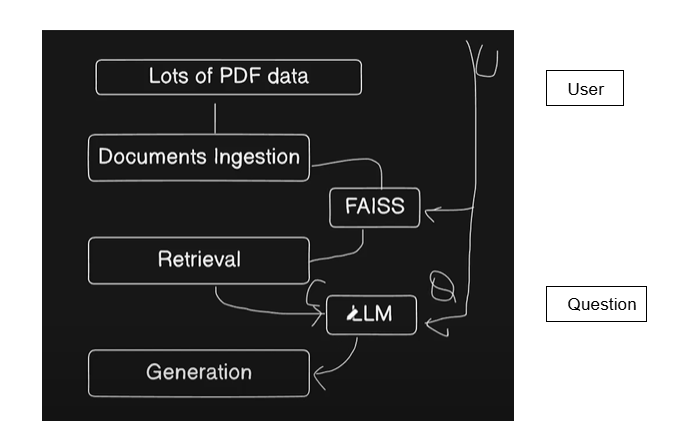

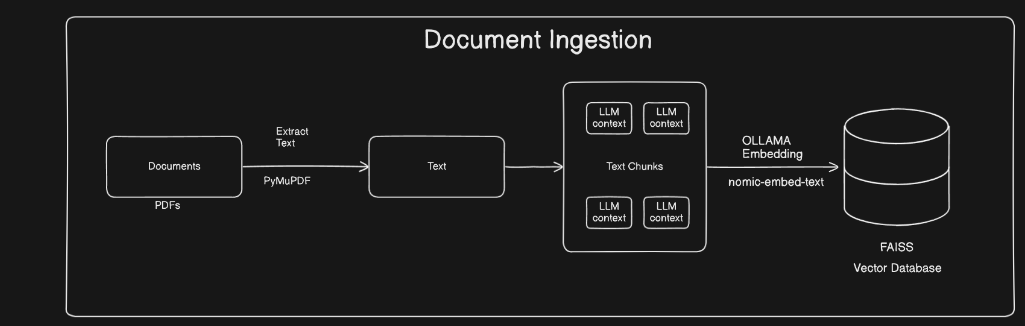

In [ ]:
#pip install -U langchain-community faiss-cpu langchain-huggingface pymupdf tiktoken langchain-ollama python-dotenv

In [3]:
import os
import warnings
from dotenv import load_dotenv #we need this to track our development(we use langsmith)

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' #when we installed the fiass and chroma db then that create some problem 
warnings.filterwarnings("ignore")

load_dotenv()

True

In [6]:
os.environ['LANGCHAIN_PROJECT']

'chat_mypdf'

### DOCUMENT LOADER


In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader #pyMUPDFLoader is a python library which is used to load and extract text from PDF  

loader = PyMuPDFLoader("./D:\btech\Projects\AI_FOR_FINTECH_PROJECTS\CHATBOT\PDF_FOR_CHATBOT\File1\Alicon Castalloy Limited_14-08-2024.pdf")
docs = loader.load()

In [ ]:
docs[0] #first page metadata and path

Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'page': 0, 'total_pages': 17, 'format': 'PDF 1.5', 'title': '', 'author': 'NEW', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': "D:20160601213630+05'30'", 'modDate': "D:20160601213630+05'30'", 'trapped': ''}, page_content=' \n \nPage 1 of 17 \n \n \n“Neuland Laboratories Limited Q4FY’16 Earnings \nConference Call” \n \nMay 20, 2016 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nMANAGEMENT: MR. D. SUCHETH RAO – CHIEF EXECUTIVE OFFICER \n& WHOLE TIME DIRECTOR, NEULAND LABORATORIES \nLIMITED \nMR. D. SAHARSH RAO – PRESIDENT & WHOLE-TIME \nDIRECTOR, NEULAND LABORATORIES LIMITED \nMR. ANIL KUMAR – CHIEF FINANCIAL OFFICER, \nNEULAND LABORATORIES LIMITED \nMODERATOR: \nMR. DIWAKAR PINGLE – CHRISTENSEN IR \n')

In [ ]:
docs   #gives the list of all pages metadata and path

[Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'page': 0, 'total_pages': 17, 'format': 'PDF 1.5', 'title': '', 'author': 'NEW', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': "D:20160601213630+05'30'", 'modDate': "D:20160601213630+05'30'", 'trapped': ''}, page_content=' \n \nPage 1 of 17 \n \n \n“Neuland Laboratories Limited Q4FY’16 Earnings \nConference Call” \n \nMay 20, 2016 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nMANAGEMENT: MR. D. SUCHETH RAO – CHIEF EXECUTIVE OFFICER \n& WHOLE TIME DIRECTOR, NEULAND LABORATORIES \nLIMITED \nMR. D. SAHARSH RAO – PRESIDENT & WHOLE-TIME \nDIRECTOR, NEULAND LABORATORIES LIMITED \nMR. ANIL KUMAR – CHIEF FINANCIAL OFFICER, \nNEULAND LABORATORIES LIMITED \nMODERATOR: \nMR. DIWAKAR PINGLE – CHRISTENSEN IR \n'),
 Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16

In [ ]:
doc = docs[0]  #0th page number
print(doc.page_content)

 
 
Page 1 of 15 
 
 
 
“Neuland Laboratories Limited Q3 FY21 Earnings 
Conference Call” 
 
February 02, 2021 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
MANAGEMENT: MR. SUCHETH DAVULURI - VICE CHAIRMAN & CEO, 
NEULAND LABORATORIES LIMITED 
MR. SAHARSH DAVULURI – VICE CHAIRMAN & 
MANAGING DIRECTOR, NEULAND LABORATORIES 
LIMITED 
MR. DEEPAK GUPTA – CFO, NEULAND 
LABORATORIES LIMITED 



In [23]:
import os # for listingout all the pdf documents 
pdfs = []
for root, dirs, files in os.walk('PDF_FOR_CHATBOT'):  #walk gives us root directory and files inside that 
    print(root,dirs,files)
    for file in files:
        if file.endswith('.pdf') :
           pdfs.append(os.path.join(root,file))   #if file ends with .pdf then we only going to append it

PDF_FOR_CHATBOT ['File 2', 'File1'] []
PDF_FOR_CHATBOT\File 2 [] ['1 Neuland-Q4-FY16.pdf', '10 Neuland-Q1-FY19.pdf', '12 Neuland-Q3-FY19.pdf', '13 Neuland-Q4-FY19.pdf', '14 Neuland-Q1-FY20.pdf', '15 Neuland-Q2-FY20.pdf', '16 Neuland-Q3-FY20.pdf', '17 Neuland-Q4-FY20.pdf', '18 Neuland-Q1-FY21.pdf', '19 Neuland-Q2-FY21.pdf', '2 Neuland-Q1-FY17.pdf', '21 Neuland-Q4-FY21.pdf', '22 Neuland-Q1-FY22.pdf', '24 Neuland-Q3-FY22.pdf', '3 Neuland-Q2-FY17.pdf', '4 Neuland-Q3-FY17.pdf', '5 Neuland-Q4-FY17.pdf', '6 Neuland-Q1-FY18.pdf', '7 Neuland-Q2-FY18.pdf', '8 Neuland-Q3-FY18.pdf', '9 Neuland-Q4-FY18.pdf']
PDF_FOR_CHATBOT\File1 [] ['20 Neuland-Q3-FY21.pdf', '23 Neuland-Q2-FY22.pdf']


In [24]:
pdfs

['PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf',
 'PDF_FOR_CHATBOT\\File 2\\10 Neuland-Q1-FY19.pdf',
 'PDF_FOR_CHATBOT\\File 2\\12 Neuland-Q3-FY19.pdf',
 'PDF_FOR_CHATBOT\\File 2\\13 Neuland-Q4-FY19.pdf',
 'PDF_FOR_CHATBOT\\File 2\\14 Neuland-Q1-FY20.pdf',
 'PDF_FOR_CHATBOT\\File 2\\15 Neuland-Q2-FY20.pdf',
 'PDF_FOR_CHATBOT\\File 2\\16 Neuland-Q3-FY20.pdf',
 'PDF_FOR_CHATBOT\\File 2\\17 Neuland-Q4-FY20.pdf',
 'PDF_FOR_CHATBOT\\File 2\\18 Neuland-Q1-FY21.pdf',
 'PDF_FOR_CHATBOT\\File 2\\19 Neuland-Q2-FY21.pdf',
 'PDF_FOR_CHATBOT\\File 2\\2 Neuland-Q1-FY17.pdf',
 'PDF_FOR_CHATBOT\\File 2\\21 Neuland-Q4-FY21.pdf',
 'PDF_FOR_CHATBOT\\File 2\\22 Neuland-Q1-FY22.pdf',
 'PDF_FOR_CHATBOT\\File 2\\24 Neuland-Q3-FY22.pdf',
 'PDF_FOR_CHATBOT\\File 2\\3 Neuland-Q2-FY17.pdf',
 'PDF_FOR_CHATBOT\\File 2\\4 Neuland-Q3-FY17.pdf',
 'PDF_FOR_CHATBOT\\File 2\\5 Neuland-Q4-FY17.pdf',
 'PDF_FOR_CHATBOT\\File 2\\6 Neuland-Q1-FY18.pdf',
 'PDF_FOR_CHATBOT\\File 2\\7 Neuland-Q2-FY18.pdf',
 'PDF_FOR_CHATBOT\\

In [31]:
docs = []
for pdf in pdfs:
    loader = PyMuPDFLoader(pdf)
    pages = loader.load()

    docs.extend(pages) #extending documents with pages 

In [32]:
docs  #all the pdf document pages come here

[Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'page': 0, 'total_pages': 17, 'format': 'PDF 1.5', 'title': '', 'author': 'NEW', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': "D:20160601213630+05'30'", 'modDate': "D:20160601213630+05'30'", 'trapped': ''}, page_content=' \n \nPage 1 of 17 \n \n \n“Neuland Laboratories Limited Q4FY’16 Earnings \nConference Call” \n \nMay 20, 2016 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nMANAGEMENT: MR. D. SUCHETH RAO – CHIEF EXECUTIVE OFFICER \n& WHOLE TIME DIRECTOR, NEULAND LABORATORIES \nLIMITED \nMR. D. SAHARSH RAO – PRESIDENT & WHOLE-TIME \nDIRECTOR, NEULAND LABORATORIES LIMITED \nMR. ANIL KUMAR – CHIEF FINANCIAL OFFICER, \nNEULAND LABORATORIES LIMITED \nMODERATOR: \nMR. DIWAKAR PINGLE – CHRISTENSEN IR \n'),
 Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16

In [ ]:
len(docs)  #total page lenght of all the pages

364

#### Text Chunking  

In [ ]:
#we are going to use recursive test splitter
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100) #1000 character for chunk size
chunks = text_splitter.split_documents(docs)

![alt text](2ac81985-e7d8-491f-9341-54fe7f5e7433.jpg)

In [36]:
len(docs) , len(chunks)

(364, 1254)

In [37]:
chunks #page content is different , basically divided

[Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'page': 0, 'total_pages': 17, 'format': 'PDF 1.5', 'title': '', 'author': 'NEW', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'creationDate': "D:20160601213630+05'30'", 'modDate': "D:20160601213630+05'30'", 'trapped': ''}, page_content='Page 1 of 17 \n \n \n“Neuland Laboratories Limited Q4FY’16 Earnings \nConference Call” \n \nMay 20, 2016 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nMANAGEMENT: MR. D. SUCHETH RAO – CHIEF EXECUTIVE OFFICER \n& WHOLE TIME DIRECTOR, NEULAND LABORATORIES \nLIMITED \nMR. D. SAHARSH RAO – PRESIDENT & WHOLE-TIME \nDIRECTOR, NEULAND LABORATORIES LIMITED \nMR. ANIL KUMAR – CHIEF FINANCIAL OFFICER, \nNEULAND LABORATORIES LIMITED \nMODERATOR: \nMR. DIWAKAR PINGLE – CHRISTENSEN IR'),
 Document(metadata={'source': 'PDF_FOR_CHATBOT\\File 2\\1 Neuland-Q4-FY16.pdf', 'f

In [44]:
print(chunks[5].page_content) , print('---') , print(docs[5].page_content)

further segregated into Prime Products and Niche Molecules. Prime Products refers to the more 
larger volume relatively undifferentiated products whereas the Niche molecules is very obvious 
in its name itself. We hope that these are steps in the right direction and our efforts would be to 
keep on improving on these metrics as we move towards achieving excellence in transparency 
and disclosure norms. 
So if you quickly take a look at this “PowerPoint Page #4” you would actually observe that CMS 
contribution in this quarter has been at about 24% compared to 16% in the previous quarter and 
there is an excel piece of interesting information which we have shared for the first time and we 
will continue to share going forward is in Page #5, we have actually shared the number of 
molecules both in Clinical and Commercial which are contributing to revenue in this quarter. 
Now, talking about the quarter itself, one of the main reasons for the revenue increase from
---
 
Neuland Laboratori

(None, None, None)

In [ ]:
len(docs[5].page_content),len(chunks[5].page_content)  #total number of character on a particular page


(2608, 975)

In [50]:
#total number of token used
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4o-mini")

len(encoding.encode(docs[5].page_content)), len(encoding.encode(chunks[5].page_content))

(649, 200)

200 token is smaller than our total context of the model(nomic-embed have 8k context window)

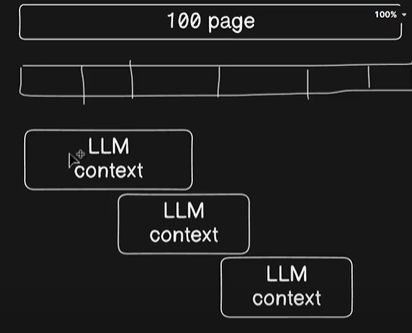

our chunks are smaller(avg. 200) than LLM context size window(8k) , and it is good .

### Document vector Embedding

In [51]:
from langchain_ollama import OllamaEmbeddings
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore # this one used for storing vector in rams

###### create embedding 


In [52]:
embeddings = OllamaEmbeddings(model='nomic-embed-text',base_url="http://localhost:11434")
single_vector = embeddings.embed_query('this is some text data')


In [53]:
single_vector

[0.020908903,
 -0.0031238515,
 -0.16348569,
 -0.05769845,
 0.023366384,
 -0.004214965,
 0.017267726,
 -0.015717695,
 -0.029030008,
 -0.04401683,
 -0.0013731159,
 0.038551677,
 0.078220494,
 -0.0129679525,
 -0.040979926,
 -0.017701393,
 -0.046820395,
 -0.04000387,
 -0.017625218,
 0.063461736,
 0.024043037,
 0.0540205,
 -0.06541946,
 -0.01764894,
 0.06786961,
 0.034003403,
 -0.008097334,
 0.029787669,
 -0.06439603,
 0.003087406,
 0.039422303,
 -0.019734597,
 -0.0005949251,
 -0.010827666,
 -0.06655211,
 -0.030647025,
 -0.01127488,
 0.008050341,
 0.027280858,
 0.03193857,
 0.032037634,
 -0.049321625,
 -0.0009848928,
 -0.046634868,
 0.009088968,
 -0.0011944051,
 0.004191651,
 0.013032559,
 0.006918991,
 -0.022340862,
 -0.0055140136,
 0.031624947,
 -0.021555167,
 -0.021880263,
 0.028373329,
 -0.007288072,
 0.0074680448,
 -0.043901235,
 0.018390272,
 -0.033008095,
 0.09622876,
 0.05971386,
 -0.08510001,
 0.03627808,
 0.07424554,
 -0.02959942,
 -0.06221037,
 0.011003305,
 -0.007530385,
 -0.010

In [ ]:
len(single_vector) #768 dimension in each vector

768

In [ ]:
index = faiss.IndexFlatL2(len(single_vector))  #from index we will know that what will be the size of vector
#creatred index with IndexflatL2 norm
index.ntotal, index.d  #ntotal - total number of items in the vector

(0, 768)

In [61]:
#fiass vector store address
#so we have to call fiass from langchain
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={}
    
)

In [63]:
ids = vector_store.add_documents(documents=chunks) #create embeddings for each of the chunk data, and those embedding are going to store in the vector store

In [65]:
ids

['ffff2c57-ae76-4a69-8996-9b7ed969e23a',
 'd37756ef-ac22-456e-ba11-71db9c7b682d',
 '55773888-b464-4fdb-b5dc-07aea153a7c2',
 '0b6735c8-28e3-40f6-b863-327387ba74a0',
 '534a6844-1959-4aeb-b30b-cfce5f38a6e9',
 'b9359f55-f941-4ee1-b443-055f8ad888f0',
 '476cdd18-3d41-4cf4-9544-a735670a5f31',
 '2a8aa713-da27-4ff2-8e4c-815be8c467b4',
 '3d0a0eee-fd13-4401-b3d9-8865eefcdf89',
 'c55da8fc-824f-497f-b12e-fded711aa967',
 'e94e8c80-63d9-47d2-95d9-72adac10d50c',
 'bfe12063-f066-4225-9e72-c9af84de1e80',
 'a23728d2-af6b-4d0a-abf6-06ffa98a849f',
 '70775031-1b47-4aaf-b09e-3e6e48288b97',
 'a0a633c2-0995-4828-99bf-3e06263a279b',
 '5991c831-f3a6-4349-9a9c-66b833628d81',
 '0204c361-76f8-44b2-9d2b-dcf695205551',
 '38081d15-3d8d-4746-93c2-18b9264f22fc',
 '989021c6-cec8-4860-bd24-ce0317799f65',
 '4a5b2cc7-efe2-4965-ad3c-326d7d3aab08',
 'c3004abd-90cb-4171-ab95-ee947f43401a',
 '9b9ffe43-0c30-4671-ac95-d739d63f0c0d',
 'b6e93d7d-ddb6-4f1c-a671-27989a1468b0',
 'a502084b-7adb-48d2-8f70-4cc97e09ee42',
 '4ecc3930-67dc-

In [66]:
len(ids)

1254

In [67]:
# index to doc store function is used to map the id with index
vector_store.index_to_docstore_id

{0: 'ffff2c57-ae76-4a69-8996-9b7ed969e23a',
 1: 'd37756ef-ac22-456e-ba11-71db9c7b682d',
 2: '55773888-b464-4fdb-b5dc-07aea153a7c2',
 3: '0b6735c8-28e3-40f6-b863-327387ba74a0',
 4: '534a6844-1959-4aeb-b30b-cfce5f38a6e9',
 5: 'b9359f55-f941-4ee1-b443-055f8ad888f0',
 6: '476cdd18-3d41-4cf4-9544-a735670a5f31',
 7: '2a8aa713-da27-4ff2-8e4c-815be8c467b4',
 8: '3d0a0eee-fd13-4401-b3d9-8865eefcdf89',
 9: 'c55da8fc-824f-497f-b12e-fded711aa967',
 10: 'e94e8c80-63d9-47d2-95d9-72adac10d50c',
 11: 'bfe12063-f066-4225-9e72-c9af84de1e80',
 12: 'a23728d2-af6b-4d0a-abf6-06ffa98a849f',
 13: '70775031-1b47-4aaf-b09e-3e6e48288b97',
 14: 'a0a633c2-0995-4828-99bf-3e06263a279b',
 15: '5991c831-f3a6-4349-9a9c-66b833628d81',
 16: '0204c361-76f8-44b2-9d2b-dcf695205551',
 17: '38081d15-3d8d-4746-93c2-18b9264f22fc',
 18: '989021c6-cec8-4860-bd24-ce0317799f65',
 19: '4a5b2cc7-efe2-4965-ad3c-326d7d3aab08',
 20: 'c3004abd-90cb-4171-ab95-ee947f43401a',
 21: '9b9ffe43-0c30-4671-ac95-d739d63f0c0d',
 22: 'b6e93d7d-ddb6-

In [64]:
#if we want to store a particular number of pdf
#store vector database
db_name = 'file 1'
vector_store.save_local(db_name)

In [68]:
#load vector database
new_vector_store = FAISS.load_local(db_name,embeddings=embeddings,allow_dangerous_deserialization=True)

In [70]:
new_vector_store.index_to_docstore_id

{0: 'ffff2c57-ae76-4a69-8996-9b7ed969e23a',
 1: 'd37756ef-ac22-456e-ba11-71db9c7b682d',
 2: '55773888-b464-4fdb-b5dc-07aea153a7c2',
 3: '0b6735c8-28e3-40f6-b863-327387ba74a0',
 4: '534a6844-1959-4aeb-b30b-cfce5f38a6e9',
 5: 'b9359f55-f941-4ee1-b443-055f8ad888f0',
 6: '476cdd18-3d41-4cf4-9544-a735670a5f31',
 7: '2a8aa713-da27-4ff2-8e4c-815be8c467b4',
 8: '3d0a0eee-fd13-4401-b3d9-8865eefcdf89',
 9: 'c55da8fc-824f-497f-b12e-fded711aa967',
 10: 'e94e8c80-63d9-47d2-95d9-72adac10d50c',
 11: 'bfe12063-f066-4225-9e72-c9af84de1e80',
 12: 'a23728d2-af6b-4d0a-abf6-06ffa98a849f',
 13: '70775031-1b47-4aaf-b09e-3e6e48288b97',
 14: 'a0a633c2-0995-4828-99bf-3e06263a279b',
 15: '5991c831-f3a6-4349-9a9c-66b833628d81',
 16: '0204c361-76f8-44b2-9d2b-dcf695205551',
 17: '38081d15-3d8d-4746-93c2-18b9264f22fc',
 18: '989021c6-cec8-4860-bd24-ce0317799f65',
 19: '4a5b2cc7-efe2-4965-ad3c-326d7d3aab08',
 20: 'c3004abd-90cb-4171-ab95-ee947f43401a',
 21: '9b9ffe43-0c30-4671-ac95-d739d63f0c0d',
 22: 'b6e93d7d-ddb6-

In [69]:
len(new_vector_store.index_to_docstore_id)

1254

### Retreival

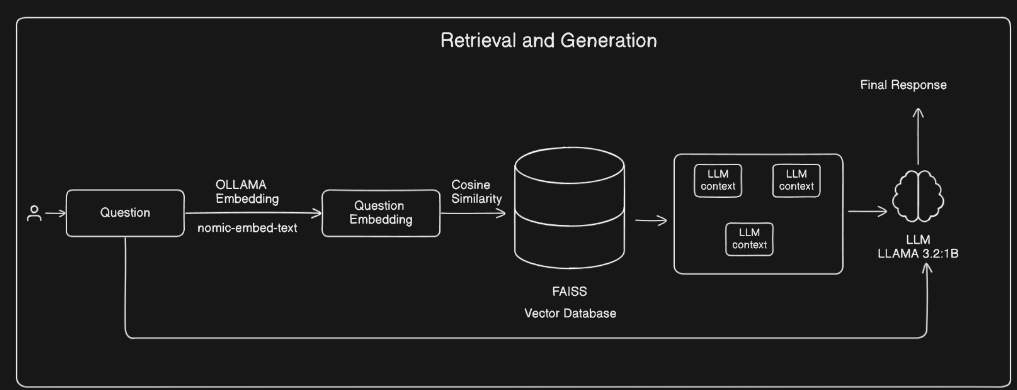

In [71]:
question = 'Given our focus on peptide chemistry and the rise in global diabetes cases, how do we plan to leverage the generic opportunities in peptides like Liraglutide and Semaglutide as they go off-patent? '
vector_store.search(query=question,search_type='similarity')

[Document(metadata={'source': 'PDF_FOR_CHATBOT\\File1\\20 Neuland-Q3-FY21.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File1\\20 Neuland-Q3-FY21.pdf', 'page': 3, 'total_pages': 15, 'format': 'PDF 1.7', 'title': '', 'author': 'Admin', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word for Office 365', 'producer': 'iOS Version 14.7.1 (Build 18G82) Quartz PDFContext, AppendMode 1.1', 'creationDate': "D:20210205140606+05'30'", 'modDate': "D:20220225020439Z00'00'", 'trapped': ''}, page_content='Neuland Laboratories Limited \nFebruary 02, 2021 \n \n \nPage 4 of 15 \nSajal Kapoor: \nSo first question is regarding our peptide business. Global innovators are projecting significant \ngrowth in the peptide molecule with respect to the chronic diseases like diabetes and some \npeptides like Liraglutide and Semaglutide there is generic opportunity which are also disclosed \nin our related pipeline of molecule. In fact, the forecast of Semaglutide is well over $8 billion \nprojected to be there by 2

In [72]:
docs = vector_store.search(query=question,search_type='similarity')

for doc in docs:
    print(doc.page_content)
    print("\n\n")

Neuland Laboratories Limited 
February 02, 2021 
 
 
Page 4 of 15 
Sajal Kapoor: 
So first question is regarding our peptide business. Global innovators are projecting significant 
growth in the peptide molecule with respect to the chronic diseases like diabetes and some 
peptides like Liraglutide and Semaglutide there is generic opportunity which are also disclosed 
in our related pipeline of molecule. In fact, the forecast of Semaglutide is well over $8 billion 
projected to be there by 2024. So given our decade long focus on peptide chemistry on the surge 
of global diabetic population, with generic opportunity in peptide should be quite meaningful 
when these molecules that we have disclosed in our pipeline they go off patent? 
Saharsh Davuluri: 
Thanks for the question, Sajal. Just to be clear the question was about opportunities in peptides, 
so I think given the fact that peptides are being developed for more broader indications like



so I think given the fact that peptides ar

In [73]:
retriever = vector_store.as_retriever(search_type='mmr',search_kwargs ={'k':3,'fetch_k':100,'lambda_mult':1})

In [74]:
retriever.invoke(question)

[Document(metadata={'source': 'PDF_FOR_CHATBOT\\File1\\20 Neuland-Q3-FY21.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File1\\20 Neuland-Q3-FY21.pdf', 'page': 3, 'total_pages': 15, 'format': 'PDF 1.7', 'title': '', 'author': 'Admin', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word for Office 365', 'producer': 'iOS Version 14.7.1 (Build 18G82) Quartz PDFContext, AppendMode 1.1', 'creationDate': "D:20210205140606+05'30'", 'modDate': "D:20220225020439Z00'00'", 'trapped': ''}, page_content='Neuland Laboratories Limited \nFebruary 02, 2021 \n \n \nPage 4 of 15 \nSajal Kapoor: \nSo first question is regarding our peptide business. Global innovators are projecting significant \ngrowth in the peptide molecule with respect to the chronic diseases like diabetes and some \npeptides like Liraglutide and Semaglutide there is generic opportunity which are also disclosed \nin our related pipeline of molecule. In fact, the forecast of Semaglutide is well over $8 billion \nprojected to be there by 2

In [75]:
docs = retriever.invoke(question)

for doc in docs:
    print(doc.page_content)
    print("\n\n")

Neuland Laboratories Limited 
February 02, 2021 
 
 
Page 4 of 15 
Sajal Kapoor: 
So first question is regarding our peptide business. Global innovators are projecting significant 
growth in the peptide molecule with respect to the chronic diseases like diabetes and some 
peptides like Liraglutide and Semaglutide there is generic opportunity which are also disclosed 
in our related pipeline of molecule. In fact, the forecast of Semaglutide is well over $8 billion 
projected to be there by 2024. So given our decade long focus on peptide chemistry on the surge 
of global diabetic population, with generic opportunity in peptide should be quite meaningful 
when these molecules that we have disclosed in our pipeline they go off patent? 
Saharsh Davuluri: 
Thanks for the question, Sajal. Just to be clear the question was about opportunities in peptides, 
so I think given the fact that peptides are being developed for more broader indications like



so I think given the fact that peptides ar

### RAG with LLAMA 3.2 on ollama

In [78]:
from langchain import hub #from hub we are going to pull out some RAG relteted prompts
from langchain_core.output_parsers import StrOutputParser #from this we are getting the final output as string data
from langchain_core.runnables import RunnablePassthrough #runnable passthrough helps in passing our question and context LLm direclty into LLM
from langchain_core.prompts import ChatPromptTemplate #need for our prompt data, we pass our prompt inside the chatpromt template, adn then we can pass our context and the question
from langchain_ollama import ChatOllama #from chatollam- langchain connect lamma 3.2 which is running at Ollama server

In [90]:
model = ChatOllama(model='llama3.2:1b',base_url='http://localhost:11434')
model.invoke('hi')

AIMessage(content='How can I help you today?', response_metadata={'model': 'llama3.2:1b', 'created_at': '2024-10-31T16:01:52.7312279Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 7956096500, 'load_duration': 5975779400, 'prompt_eval_count': 26, 'prompt_eval_duration': 1058273000, 'eval_count': 8, 'eval_duration': 819463000}, id='run-9a02958d-4f21-4f83-b3e9-414c7c02ba9f-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

In [80]:
model = ChatOllama(model='llama3.2:3b',base_url='http://localhost:11434')
model.invoke('hi')

AIMessage(content='How can I assist you today?', response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-10-31T15:30:47.4715825Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 26255425900, 'load_duration': 21278974200, 'prompt_eval_count': 26, 'prompt_eval_duration': 3047733000, 'eval_count': 8, 'eval_duration': 1756956000}, id='run-cb4da38d-f88d-4b75-992d-b27869e1f281-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

In [ ]:
#if we don't waana write our prompt by ourself then we can pull our prompt from this technique to answer the question 
prompt = hub.pull('rlm/rag-prompt')
prompt

ChatPromptTemplate(input_variables=['context', 'question'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))])

In [82]:
prompt = """
    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
    If you don't know the answer, just say that you don't know.
    Answer in bullet points. Make sure your answer is relevant to the question and it is answered from the context only.
    Question: {question} 
    Context: {context} 
    Answer:
"""

prompt = ChatPromptTemplate.from_template(prompt)
prompt

ChatPromptTemplate(input_variables=['context', 'question'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="\n    You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.\n    If you don't know the answer, just say that you don't know.\n    Answer in bullet points. Make sure your answer is relevant to the question and it is answered from the context only.\n    Question: {question} \n    Context: {context} \n    Answer:\n"))])

##### our data (from pdf --> Chunks ---> LLM Context) an question is working as context for LLM model

In [85]:
docs

[Document(metadata={'source': 'PDF_FOR_CHATBOT\\File1\\20 Neuland-Q3-FY21.pdf', 'file_path': 'PDF_FOR_CHATBOT\\File1\\20 Neuland-Q3-FY21.pdf', 'page': 3, 'total_pages': 15, 'format': 'PDF 1.7', 'title': '', 'author': 'Admin', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word for Office 365', 'producer': 'iOS Version 14.7.1 (Build 18G82) Quartz PDFContext, AppendMode 1.1', 'creationDate': "D:20210205140606+05'30'", 'modDate': "D:20220225020439Z00'00'", 'trapped': ''}, page_content='Neuland Laboratories Limited \nFebruary 02, 2021 \n \n \nPage 4 of 15 \nSajal Kapoor: \nSo first question is regarding our peptide business. Global innovators are projecting significant \ngrowth in the peptide molecule with respect to the chronic diseases like diabetes and some \npeptides like Liraglutide and Semaglutide there is generic opportunity which are also disclosed \nin our related pipeline of molecule. In fact, the forecast of Semaglutide is well over $8 billion \nprojected to be there by 2

In [ ]:
#joining all the chunks of docs into a single docs so that we can pass all of our data(context) into a single docs(context) to LLM

def format_docs(docs):
    return "\n \n".join([doc.page_content for doc in docs]) #iterate through all the docs and combine it with two new line 
print(format_docs(docs))

Neuland Laboratories Limited 
February 02, 2021 
 
 
Page 4 of 15 
Sajal Kapoor: 
So first question is regarding our peptide business. Global innovators are projecting significant 
growth in the peptide molecule with respect to the chronic diseases like diabetes and some 
peptides like Liraglutide and Semaglutide there is generic opportunity which are also disclosed 
in our related pipeline of molecule. In fact, the forecast of Semaglutide is well over $8 billion 
projected to be there by 2024. So given our decade long focus on peptide chemistry on the surge 
of global diabetic population, with generic opportunity in peptide should be quite meaningful 
when these molecules that we have disclosed in our pipeline they go off patent? 
Saharsh Davuluri: 
Thanks for the question, Sajal. Just to be clear the question was about opportunities in peptides, 
so I think given the fact that peptides are being developed for more broader indications like
 
so I think given the fact that peptides are

Now we prepare RAG CHAIN

In [86]:
rag_chain = (
    {'context': retriever|format_docs,'question': RunnablePassthrough()}
    |prompt
    |model
    |StrOutputParser()

)

In [87]:
output = rag_chain.invoke(question)

In [89]:
print(question),print(output)

Given our focus on peptide chemistry and the rise in global diabetes cases, how do we plan to leverage the generic opportunities in peptides like Liraglutide and Semaglutide as they go off-patent? 
Here are the relevant points from the context:

• Neuland Laboratories Limited has been focusing on peptide chemistry for a decade, particularly in chronic diseases like diabetes.
• The company has identified generic opportunities in peptides like Liraglutide and Semaglutide as they go off-patent.
• Neuland is currently developing new chemical entity peptide APIs, including making peptide building blocks and working with innovators on CMS projects.
• The company has started developing peptide APIs internally, initially focusing on low-value items but now moving forward to develop peptides for the generic markets.
• Neuland aims to file DMFs (Drug Master Files) for at least one or two peptide APIs next year and offer them to the generics market.
• The generic peptide market is not crowded, of

(None, None)

In [91]:
question2='who is Navin'
output2 = rag_chain.invoke(question2)
print(question2),print(output2)

who is Navin
I don't know who Navin is based on the provided context.


(None, None)